Cho tập dữ liệu hãy thực hiện các bước phân tích sau: Xây dựng mô hình hồi quy tuyến tính dự báo điểm thi LOGIC dựa trên các điểm toán và giới tính trong các học kì của năm cấp 3
1.	Tải dữ liệu diemthidaihoc.csv và hiển thị các dòng dữ liệu
2.	Tiến hành EDA dữ liệu, ví dụ: Hãy thống kê các độ đo cơ bản của dữ liệu và nhận xét
3.	Chia tập dữ liệu thành tập train và test với tỉ lệ 80:20 và random state là 16
4.	Tiến hành transform theo hàm x*x dữ liệu input đầu vào trên tập train
5.	Tiến hành EDA dữ liệu các điểm toán sau khi transform. Ví dụ: Hãy vẽ biểu đồ phân phối các điểm toán và cho nhận xét
6.	Tiến hành tiếp tục chuẩn hóa minmaxscale dữ liệu đầu vào trên tập train
7.	Tiến hành EDA dữ liệu các điểm toán sau khi minmaxscale. Ví dụ: Hãy vẽ biểu đồ Boxplot của điểm toán các học kì và cho nhận xét
8.	Xây dựng mô hình hồi quy tuyến tính dự báo điểm LOGIC dựa trên các yếu tố điểm toán và giới tính
9.	Hãy đánh giá mô hình trên tập train và test. Ví dụ: so sánh kết quả MAE trên tập train và test đưa ra nhận xét
10.	Ứng dụng dự báo, với điểm toán các học kì 1,2 các năm lớp 10,11,12 và giới tính lần lượt là: 5.0, 6.5, 7.0, 7.0, 6.5, 6.0 và giới tính là nam thì điểm thi LOGIC là bao nhiêu.


# Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.	Tải dữ liệu diemthidaihoc.csv và hiển thị các dòng dữ liệu

In [34]:
# Đọc dữ liệu từ file csv
df = pd.read_csv('data/dulieuxettuyendaihoc.csv')
df.head(10)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
5,SV006,9.3,9.6,7.1,8.5,8.5,7.8,M,NaN,1,1.50,4.00,6.00,D1,12/7/2018,No
6,SV007,2.8,4.4,4.6,4.7,5.4,5.3,F,NaN,2,6.50,6.75,5.25,C,12/7/2018,Yes
7,SV008,8.3,6.7,8.6,8.3,8.5,8.3,F,NaN,2,3.75,4.50,4.25,D1,12/7/2018,Yes
8,SV009,6.5,7.3,6.4,8.1,7.7,7.7,F,NaN,1,3.50,3.50,6.75,D1,12/7/2018,Yes
9,SV0010,7.3,8.0,6.5,5.5,7.5,6.9,F,NaN,1,4.00,4.75,5.50,D1,12/7/2018,Yes


In [35]:
df = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT', 'TOANLOGICPHANTICH']]
df.head(10)

,T1,T2,T3,T4,T5,T6,GT,TOANLOGICPHANTICH
0,7.2,8.4,7.4,7.2,7.4,6.9,F,3.25
1,5.4,6.3,4.3,4.9,3.0,4.0,M,4.00
2,5.6,5.0,2.8,6.1,4.8,5.7,M,6.75
3,6.6,5.1,5.9,4.1,6.1,7.4,M,4.25
4,6.0,5.4,7.6,4.4,6.8,8.0,M,4.50
5,9.3,9.6,7.1,8.5,8.5,7.8,M,4.00
6,2.8,4.4,4.6,4.7,5.4,5.3,F,6.75
7,8.3,6.7,8.6,8.3,8.5,8.3,F,4.50
8,6.5,7.3,6.4,8.1,7.7,7.7,F,3.50
9,7.3,8.0,6.5,5.5,7.5,6.9,F,4.75


In [36]:
df.rename(columns={'TOANLOGICPHANTICH': 'LOGIC'}, inplace=True)
df.head(10)

,T1,T2,T3,T4,T5,T6,GT,LOGIC
0,7.2,8.4,7.4,7.2,7.4,6.9,F,3.25
1,5.4,6.3,4.3,4.9,3.0,4.0,M,4.00
2,5.6,5.0,2.8,6.1,4.8,5.7,M,6.75
3,6.6,5.1,5.9,4.1,6.1,7.4,M,4.25
4,6.0,5.4,7.6,4.4,6.8,8.0,M,4.50
5,9.3,9.6,7.1,8.5,8.5,7.8,M,4.00
6,2.8,4.4,4.6,4.7,5.4,5.3,F,6.75
7,8.3,6.7,8.6,8.3,8.5,8.3,F,4.50
8,6.5,7.3,6.4,8.1,7.7,7.7,F,3.50
9,7.3,8.0,6.5,5.5,7.5,6.9,F,4.75


# 2. Tiến hành EDA dữ liệu, ví dụ: Hãy thống kê các độ đo cơ bản của dữ liệu và nhận xét về dữ liệu.

In [37]:
df.describe()


,T1,T2,T3,T4,T5,T6,LOGIC
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000
mean,5.946000,6.374000,6.383000,6.291000,6.717000,6.9370,4.255000
std,1.608338,1.561443,1.574484,1.469563,1.478059,1.3632,1.060053
min,2.400000,2.800000,2.300000,2.900000,3.000000,3.7000,1.500000
25%,5.000000,5.300000,5.175000,5.300000,5.800000,6.0000,3.500000
50%,5.850000,6.250000,6.650000,6.350000,6.800000,7.1000,4.125000
75%,7.200000,7.525000,7.500000,7.600000,7.800000,8.0000,4.750000
max,9.300000,9.600000,9.500000,9.400000,9.500000,9.5000,8.000000


In [38]:
# Kiểm tra giá trị thiếu
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

Số lượng giá trị thiếu trong mỗi cột:
T1       0
T2       0
T3       0
T4       0
T5       0
T6       0
GT       0
LOGIC    0
dtype: int64


In [39]:
df = pd.get_dummies(df, columns=['GT'], dtype=int)
df.head(20)


,T1,T2,T3,T4,T5,T6,LOGIC,GT_F,GT_M
0,7.2,8.4,7.4,7.2,7.4,6.9,3.25,1,0
1,5.4,6.3,4.3,4.9,3.0,4.0,4.00,0,1
2,5.6,5.0,2.8,6.1,4.8,5.7,6.75,0,1
3,6.6,5.1,5.9,4.1,6.1,7.4,4.25,0,1
4,6.0,5.4,7.6,4.4,6.8,8.0,4.50,0,1
5,9.3,9.6,7.1,8.5,8.5,7.8,4.00,0,1
6,2.8,4.4,4.6,4.7,5.4,5.3,6.75,1,0
7,8.3,6.7,8.6,8.3,8.5,8.3,4.50,1,0
8,6.5,7.3,6.4,8.1,7.7,7.7,3.50,1,0
9,7.3,8.0,6.5,5.5,7.5,6.9,4.75,1,0


# 3.	Chia tập dữ liệu thành tập train và test với tỉ lệ 80:20 và random state là 16

In [40]:
from sklearn.model_selection import train_test_split
X = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT_F', 'GT_M']].values
y = df[['LOGIC']].values


X = X.astype(float)
y = y.astype(float)
# Split the data into training and testing sets with a ratio of 80:20 and random state of 16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [41]:
X_train = pd.DataFrame(X_train, columns=['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT_F', 'GT_M'])
X_train.head(10)


,T1,T2,T3,T4,T5,T6,GT_F,GT_M
0,3.7,4.1,3.1,3.4,5.5,5.7,1.0,0.0
1,9.3,9.6,7.1,8.5,8.5,7.8,0.0,1.0
2,8.1,8.8,9.2,8.8,8.9,8.5,0.0,1.0
3,4.9,6.1,2.5,6.2,4.9,6.5,0.0,1.0
4,4.6,7.2,7.6,6.2,8.0,7.2,0.0,1.0
5,5.7,3.9,5.7,4.6,6.8,7.3,0.0,1.0
6,4.3,5.3,7.3,7.7,7.4,7.1,0.0,1.0
7,7.9,8.2,8.1,6.9,8.0,8.1,0.0,1.0
8,5.2,6.3,7.8,7.6,6.2,7.3,1.0,0.0
9,6.3,6.3,5.2,6.1,6.0,5.7,0.0,1.0


# 4.	Tiến hành transform theo hàm x*x dữ liệu input đầu vào trên tập train

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

#transformer có chức năng biến đổi dữ liệu theo hàm bình phương (x*x)
square_transformer = FunctionTransformer(np.square)
X_train = square_transformer.transform(X_train)

In [43]:
X_train

,T1,T2,T3,T4,T5,T6,GT_F,GT_M
0,13.69,16.81,9.61,11.56,30.25,32.49,1.0,0.0
1,86.49,92.16,50.41,72.25,72.25,60.84,0.0,1.0
2,65.61,77.44,84.64,77.44,79.21,72.25,0.0,1.0
3,24.01,37.21,6.25,38.44,24.01,42.25,0.0,1.0
4,21.16,51.84,57.76,38.44,64.00,51.84,0.0,1.0
...,...,...,...,...,...,...,...,...
75,6.76,14.44,34.81,46.24,39.69,64.00,0.0,1.0
76,53.29,65.61,67.24,62.41,70.56,65.61,0.0,1.0
77,9.00,12.25,14.44,30.25,25.00,26.01,0.0,1.0
78,36.00,38.44,26.01,26.01,12.25,31.36,0.0,1.0


In [44]:
X_train = pd.DataFrame(X_train, columns=['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT_F', 'GT_M'])

In [45]:
X_train

,T1,T2,T3,T4,T5,T6,GT_F,GT_M
0,13.69,16.81,9.61,11.56,30.25,32.49,1.0,0.0
1,86.49,92.16,50.41,72.25,72.25,60.84,0.0,1.0
2,65.61,77.44,84.64,77.44,79.21,72.25,0.0,1.0
3,24.01,37.21,6.25,38.44,24.01,42.25,0.0,1.0
4,21.16,51.84,57.76,38.44,64.00,51.84,0.0,1.0
...,...,...,...,...,...,...,...,...
75,6.76,14.44,34.81,46.24,39.69,64.00,0.0,1.0
76,53.29,65.61,67.24,62.41,70.56,65.61,0.0,1.0
77,9.00,12.25,14.44,30.25,25.00,26.01,0.0,1.0
78,36.00,38.44,26.01,26.01,12.25,31.36,0.0,1.0


In [46]:
y_train

array([[3.75],
       [4.  ],
       [4.  ],
       [5.5 ],
       [4.5 ],
       [4.5 ],
       [4.  ],
       [6.5 ],
       [4.  ],
       [4.75],
       [4.5 ],
       [5.  ],
       [3.  ],
       [6.75],
       [2.5 ],
       [4.  ],
       [3.5 ],
       [4.  ],
       [5.  ],
       [3.5 ],
       [3.25],
       [4.5 ],
       [5.25],
       [3.5 ],
       [4.75],
       [4.25],
       [4.5 ],
       [4.5 ],
       [3.5 ],
       [6.75],
       [3.75],
       [2.25],
       [5.5 ],
       [4.25],
       [3.5 ],
       [2.25],
       [4.  ],
       [3.5 ],
       [4.5 ],
       [5.5 ],
       [5.  ],
       [5.5 ],
       [3.  ],
       [6.  ],
       [4.5 ],
       [5.25],
       [4.  ],
       [5.75],
       [3.  ],
       [4.75],
       [3.75],
       [4.  ],
       [4.5 ],
       [3.5 ],
       [3.75],
       [4.5 ],
       [5.25],
       [3.5 ],
       [4.  ],
       [3.5 ],
       [5.25],
       [3.25],
       [4.  ],
       [4.5 ],
       [4.5 ],
       [3.5 ],
       [1.

In [47]:
y_train = pd.DataFrame(y_train, columns=['LOGIC'])

In [48]:
y_train

,LOGIC
0,3.75
1,4.00
2,4.00
3,5.50
4,4.50
...,...
75,4.75
76,6.00
77,3.75
78,3.75


In [49]:
X_test = pd.DataFrame(X_test,  columns=['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT_F', 'GT_M'])
X_test

,T1,T2,T3,T4,T5,T6,GT_F,GT_M
0,8.3,6.7,8.6,8.3,8.5,8.3,1.0,0.0
1,3.6,4.2,4.2,4.8,5.8,3.7,1.0,0.0
2,3.0,4.8,4.7,5.0,6.8,9.0,1.0,0.0
3,7.0,7.2,7.0,6.5,4.0,5.5,1.0,0.0
4,7.9,7.3,7.8,9.4,8.6,8.1,0.0,1.0
5,4.5,5.5,6.8,5.6,5.3,6.1,0.0,1.0
6,7.5,7.6,6.8,6.8,8.0,6.6,0.0,1.0
7,5.2,6.5,7.4,7.4,5.4,6.6,0.0,1.0
8,5.5,6.2,7.3,7.9,7.1,7.7,1.0,0.0
9,7.3,8.0,6.5,5.5,7.5,6.9,1.0,0.0


In [50]:
#X_train = X_train ** 2

# 5.	Tiến hành EDA dữ liệu các điểm toán sau khi transform. Ví dụ: Hãy vẽ biểu đồ phân phối các điểm toán và cho nhận xét về phân phối của các điểm toán sau khi transform.

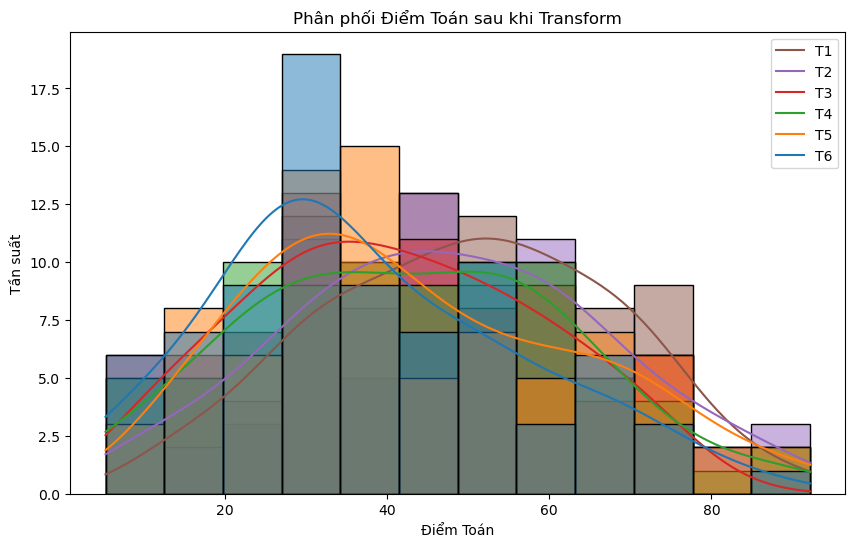

In [51]:
import seaborn as sns

# Select the desired columns using double square brackets
selected_columns = X_train[['T1', 'T2', 'T3', 'T4', 'T5', 'T6']]

plt.figure(figsize=(10, 6))
sns.histplot(data=selected_columns, kde=True, color='skyblue')
plt.title('Phân phối Điểm Toán sau khi Transform')
plt.xlabel('Điểm Toán')
plt.ylabel('Tần suất')
plt.legend(['T1', 'T2', 'T3', 'T4', 'T5', 'T6'])
plt.show()

# 6.	Tiến hành tiếp tục chuẩn hóa minmaxscale dữ liệu đầu vào trên tập train

In [52]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [53]:
X_train = pd.DataFrame(X_train, columns=['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'GT_F', 'GT_M'])

In [54]:
X_train

,T1,T2,T3,T4,T5,T6,GT_F,GT_M
0,0.098229,0.072844,0.050847,0.045632,0.261538,0.245559,1.0,0.0
1,1.000000,1.000000,0.531073,0.924815,0.778462,0.615857,0.0,1.0
2,0.741360,0.818875,0.933969,1.000000,0.864123,0.764890,0.0,1.0
3,0.226062,0.323859,0.011299,0.435028,0.184738,0.373041,0.0,1.0
4,0.190759,0.503876,0.617585,0.435028,0.676923,0.498302,0.0,1.0
...,...,...,...,...,...,...,...,...
75,0.012387,0.043682,0.347458,0.548023,0.377723,0.657132,0.0,1.0
76,0.588753,0.673311,0.729167,0.782269,0.757662,0.678161,0.0,1.0
77,0.040134,0.016734,0.107698,0.316384,0.196923,0.160920,0.0,1.0
78,0.374582,0.338993,0.243879,0.254962,0.040000,0.230799,0.0,1.0


In [55]:
y_train

,LOGIC
0,3.75
1,4.00
2,4.00
3,5.50
4,4.50
...,...
75,4.75
76,6.00
77,3.75
78,3.75


In [56]:
X_test

,T1,T2,T3,T4,T5,T6,GT_F,GT_M
0,8.3,6.7,8.6,8.3,8.5,8.3,1.0,0.0
1,3.6,4.2,4.2,4.8,5.8,3.7,1.0,0.0
2,3.0,4.8,4.7,5.0,6.8,9.0,1.0,0.0
3,7.0,7.2,7.0,6.5,4.0,5.5,1.0,0.0
4,7.9,7.3,7.8,9.4,8.6,8.1,0.0,1.0
5,4.5,5.5,6.8,5.6,5.3,6.1,0.0,1.0
6,7.5,7.6,6.8,6.8,8.0,6.6,0.0,1.0
7,5.2,6.5,7.4,7.4,5.4,6.6,0.0,1.0
8,5.5,6.2,7.3,7.9,7.1,7.7,1.0,0.0
9,7.3,8.0,6.5,5.5,7.5,6.9,1.0,0.0


# 7.	Tiến hành EDA dữ liệu các điểm toán sau khi minmaxscale. Ví dụ: Hãy vẽ biểu đồ Boxplot của điểm toán các học kì và cho nhận xét

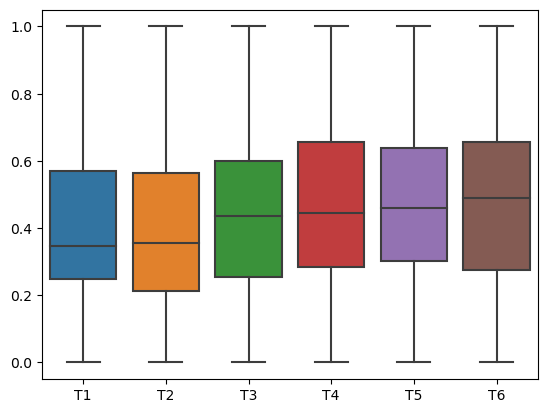

In [57]:
sns.boxplot(data=X_train[['T1', 'T2', 'T3', 'T4', 'T5', 'T6']])
plt.show()


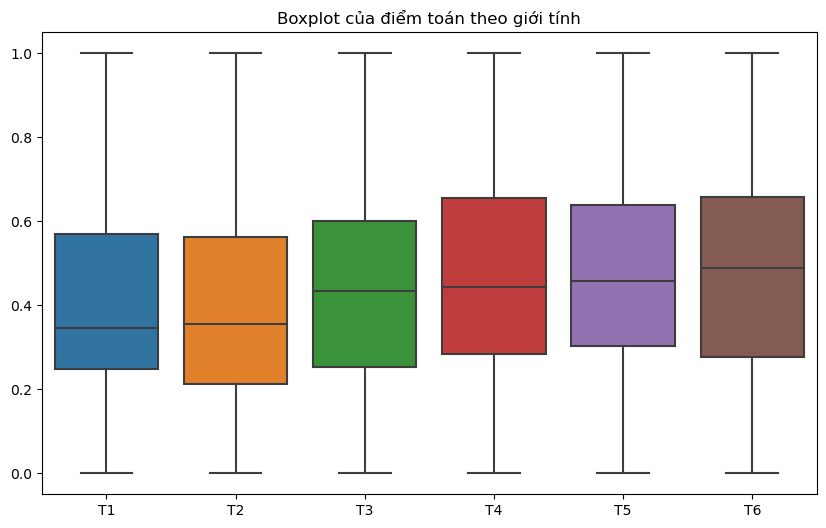

In [58]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train[['T1', 'T2', 'T3', 'T4', 'T5', 'T6']])
plt.title('Boxplot của điểm toán theo giới tính')
plt.show()

# 8.	Xây dựng mô hình hồi quy tuyến tính dự báo điểm LOGIC dựa trên các yếu tố điểm toán và giới tính

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
#To rereieve the intercept:
# hệ số tự do của mô hình hồi quy tuyến tính
print(f'Intercept: {model.intercept_}')

Intercept: [3.78571678]


In [61]:
print(f'Coefficents: {model.coef_}')

Coefficents: [[ 0.43664132 -0.00739406 -0.7147351  -0.27820311  0.16259316  1.50580223
  -0.27458709  0.27458709]]


# 9.	Hãy đánh giá mô hình trên tập train và test. Ví dụ: so sánh kết quả MAE trên tập train và test đưa ra nhận xét

In [62]:
# Train
from sklearn import metrics
y_train_pred = model.predict(X_train)
print('Score or R_Squared', model.score(X_train, y_train))
print('Mean Absolute Error', metrics.mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean Absolute Percentage Error', metrics.mean_absolute_percentage_error(y_train, y_train_pred))

Score or R_Squared 0.13977249358909016
Mean Absolute Error 0.7150219369444111
Mean Squared Error 0.9861617891121399
Root Mean Squared Error 0.9930567904768286
Mean Absolute Percentage Error 0.18337393527574514


In [63]:
# Test
from sklearn import metrics
# Chuẩn hóa X_test
X_test = square_transformer.transform(X_test)
X_test = scaler.transform(X_test)
y_test_pred = model.predict(X_test)
print('Score or R_Squared', model.score(X_test, y_test))
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error', metrics.mean_absolute_percentage_error(y_test, y_test_pred))

Score or R_Squared 0.1100090719587451
Mean Absolute Error 0.6904837303890592
Mean Squared Error 0.8281087463258864
Root Mean Squared Error 0.9100048056608747
Mean Absolute Percentage Error 0.19826947559034255


c:\Users\Hakate\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Hakate\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1. **R-Squared (Score):**
   - Trên tập train: 0.13977249358909016
   - Trên tập test: 0.1100090719587451
   - Nhận xét: R-Squared thấp cho cả train và test, cho thấy mô hình không giải thích được một phần lớn sự biến thiên của dữ liệu.

2. **Mean Absolute Error (MAE):**
   - Trên tập train: 0.7150219369444111
   - Trên tập test: 0.6904837303890592
   - Nhận xét: MAE là mức độ trung bình của sự chênh lệch giữa giá trị dự đoán và giá trị thực tế. Sự giảm giảm trong MAE từ train đến test có vẻ tích cực, nhưng giá trị còn khá cao nên mô hình vẫn chưa tốt.

3. **Mean Squared Error (MSE):**
   - Trên tập train: 0.9861617891121399
   - Trên tập test: 0.8281087463258864
   - Nhận xét: MSE là mức độ trung bình của bình phương của sự chênh lệch giữa giá trị dự đoán và giá trị thực tế. Giảm giảm từ train đến test là tích cực, nhưng vẫn còn khá cao.

4. **Root Mean Squared Error (RMSE):**
   - Trên tập train: 0.9930567904768286
   - Trên tập test: 0.9100048056608747
   - Nhận xét: RMSE là căn bậc hai của MSE. Giảm giảm từ train đến test, nhưng vẫn còn cao. RMSE nhạy cảm với các giá trị ngoại lệ.

5. **Mean Absolute Percentage Error (MAPE):**
   - Trên tập train: 0.18337393527574514
   - Trên tập test: 0.19826947559034255
   - Nhận xét: MAPE đo lường tỷ lệ trung bình của sự sai lệch tuyệt đối giữa giá trị dự đoán và giá trị thực tế. Sự tăng giảm từ train đến test có thể là dấu hiệu của sự overfitting.

Tổng quan, mô hình có vẻ như đã được huấn luyện quá mức trên tập train và không tổng quát hóa tốt trên tập test. Cần xem xét các biện pháp cải thiện mô hình như tinh chỉnh tham số, giảm độ phức tạp của mô hình, hoặc thêm dữ liệu để cải thiện hiệu suất trên tập test.

# 10.	Ứng dụng dự báo, với điểm toán các học kì 1,2 các năm lớp 10,11,12 và giới tính lần lượt là: 5.0, 6.5, 7.0, 7.0, 6.5, 6.0 và giới tính là nam thì điểm thi LOGIC là bao nhiêu.

In [64]:
vT1 = 5.0
vT2 = 6.5
vT3 = 7.0
vT4 = 7.0
vT5 = 6.5
vT6 = 6.0
vF = 0
vM = 1

# Chuẩn hóa trước khi đưa vào dự báo điểm LOGiC
squared = square_transformer.transform([[vT1, vT2, vT3, vT4, vT5, vT6, vF, vM]])
scaled = scaler.transform(squared)
print(f"Giá trị sau khi scale: {scaled}")

# Dự báo điểm logic
predicted_logic =  model.predict(scaled)
print('Điểm thi LOGIC dự báo là: ', predicted_logic)




Giá trị sau khi scale: [[0.23832528 0.38587425 0.5144774  0.58800522 0.40923077 0.29140543
  0.         1.        ]]
Điểm thi LOGIC dự báo là:  [[4.1355505]]


c:\Users\Hakate\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Hakate\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 11.	Trực quan hóa mô hình hồi quy tuyến tính. Ví dụ: Hãy vẽ biểu đồ phân tán giữa điểm thi LOGIC thực tế và điểm thi LOGIC dự báo trên tập test

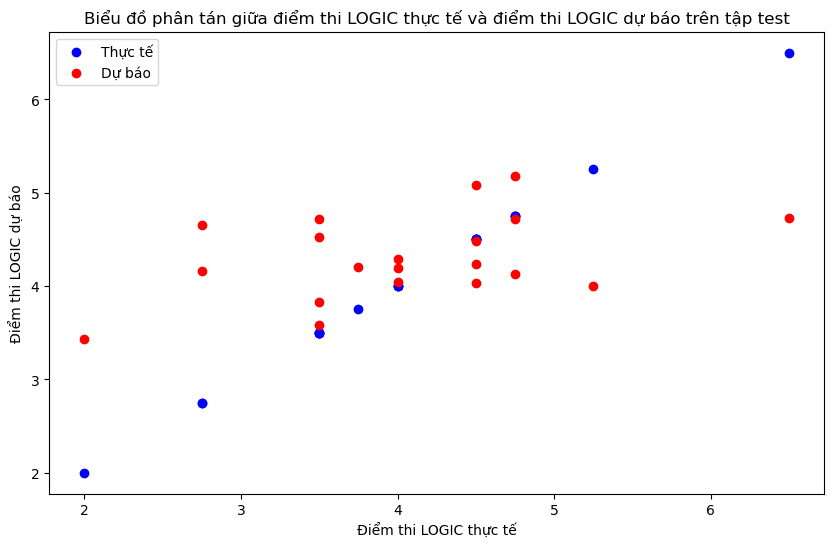

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test, color='blue', label='Thực tế')

plt.scatter(y_test, y_test_pred, color='red', label='Dự báo')

plt.xlabel('Điểm thi LOGIC thực tế')
plt.ylabel('Điểm thi LOGIC dự báo')
plt.title('Biểu đồ phân tán giữa điểm thi LOGIC thực tế và điểm thi LOGIC dự báo trên tập test')
plt.legend() 